In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

<img src="figures/unsupervised_workflow.svg" width=100%>

In [19]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split
import numpy as np
np.set_printoptions(suppress=True)

digits = load_digits()
X, y = digits.data, digits.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

Removing mean and scaling variance
===================================

In [20]:
from sklearn.preprocessing import StandardScaler

1) Instantiate the model

In [21]:
scaler = StandardScaler()

2) Fit using only the data.

In [22]:
scaler.fit(X_train)

StandardScaler(copy=True, with_mean=True, with_std=True)

3) `transform` the data (not `predict`).

In [23]:
X_train_scaled = scaler.transform(X_train)

In [24]:
X_train.shape

(1347, 64)

In [25]:
X_train_scaled.shape

(1347, 64)

The transformed version of the data has the mean removed:

In [26]:
X_train_scaled.mean(axis=0)

array([ 0.,  0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0., -0., -0.,
        0.,  0.,  0., -0., -0., -0.,  0.,  0., -0., -0.,  0., -0., -0.,
       -0.,  0., -0., -0.,  0.,  0.,  0., -0.,  0.,  0.,  0.,  0., -0.,
        0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0., -0.,  0., -0.,
        0., -0., -0., -0., -0.,  0.,  0.,  0.,  0., -0., -0.,  0.])

In [27]:
X_train_scaled.std(axis=0)

array([ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,
        0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.])

In [28]:
X_test_transformed = scaler.transform(X_test)

Principal Component Analysis
=============================

0) Import the model

In [29]:
from sklearn.decomposition import PCA

1) Instantiate the model

In [30]:
pca = PCA(n_components=2)

2) Fit to training data

In [31]:
pca.fit(X)

PCA(copy=True, n_components=2, whiten=False)

3) Transform to lower-dimensional representation

In [32]:
print(X.shape)
X_pca = pca.transform(X)
X_pca.shape

(1797, 64)


(1797, 2)

Visualize
----------

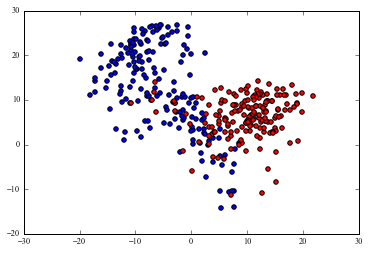

In [36]:
plt.figure
i1 = y == 1
i2 = y == 2
plt.scatter(X_pca[:, 0][i1], X_pca[:, 1][i1], c='b')#, c=y)
plt.scatter(X_pca[:, 0][i2], X_pca[:, 1][i2], c='r')

Manifold Learning
==================

In [37]:
from sklearn.manifold import Isomap
isomap = Isomap()

In [38]:
X_isomap = isomap.fit_transform(X)

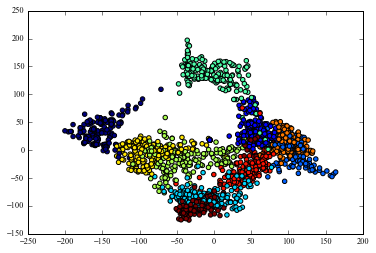

In [39]:
plt.scatter(X_isomap[:, 0], X_isomap[:, 1], c=y)

# Exercises
Visualize the digits dataset using the TSNE algorithm from the sklearn.manifold module (it runs for a couple of seconds).


In [ ]:
# %load solutions/digits_tsne.py

In [40]:
from sklearn.manifold import TSNE

In [44]:
tsne = TSNE()

In [45]:
tsne.fit(X_train)

In [47]:
X_tsne = tsne.fit_transform(X)

In [48]:
X_tsne.shape

(1797, 2)

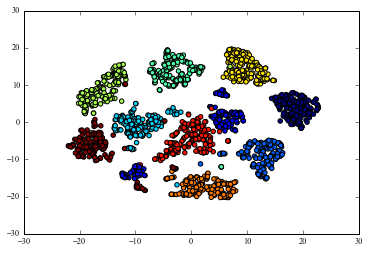

In [49]:
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=y)